In [109]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import tree
import os
import pickle

In [110]:
# Read the csv file into a pandas DataFrame

loan_df = pd.read_csv('UpdatedLoan_Dataset.csv')
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [111]:
loan_df = loan_df.dropna()
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [112]:
loan_df["TotalHouseholdIncome"] = loan_df["ApplicantIncome"] + loan_df["CoapplicantIncome"]

In [113]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalHouseholdIncome
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0


In [114]:
# Assign X (data) and y (target)
X = loan_df[['TotalHouseholdIncome', 'Credit_History', 'Property_Area', 'Gender', 'Married', 'Education', 'Loan_Amount_Term', 'LoanAmount' ]]
# X = loan_df[['TotalHouseholdIncome', 'Property_Area', 'Married', 'Education']]
y = loan_df["Loan_Status"]
print(X.shape, y.shape)

(480, 8) (480,)


In [115]:
loan_df.dtypes

Loan_ID                  object
Gender                   object
Married                  object
Dependents               object
Education                object
Self_Employed            object
ApplicantIncome           int64
CoapplicantIncome       float64
LoanAmount              float64
Loan_Amount_Term        float64
Credit_History          float64
Property_Area            object
Loan_Status              object
TotalHouseholdIncome    float64
dtype: object

In [116]:
loan_df["Property_Area"].value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

In [117]:
loan_df["Gender"].value_counts()

Male      394
Female     86
Name: Gender, dtype: int64

In [118]:
loan_df["Education"].value_counts()

Graduate        383
Not Graduate     97
Name: Education, dtype: int64

In [119]:
cleanup_nums = {"Property_Area": {"Rural": 0, "Urban": 1, "Semiurban":2},
               "Gender": {"Male": 0, "Female": 1},
               "Education": {"Graduate":1, "Not Graduate": 0},
               "Married": {"Yes": 1, "No":0},
                "Self_Employed": {"Yes": 1, "No": 0},
                "Loan_Status": {"Y": 1, "N": 0} 
               }
print(cleanup_nums)

{'Property_Area': {'Rural': 0, 'Urban': 1, 'Semiurban': 2}, 'Gender': {'Male': 0, 'Female': 1}, 'Education': {'Graduate': 1, 'Not Graduate': 0}, 'Married': {'Yes': 1, 'No': 0}, 'Self_Employed': {'Yes': 1, 'No': 0}, 'Loan_Status': {'Y': 1, 'N': 0}}


In [120]:
X

,TotalHouseholdIncome,Credit_History,Property_Area,Gender,Married,Education,Loan_Amount_Term,LoanAmount
1,6091.0,1.0,Rural,Male,Yes,Graduate,360.0,128.0
2,3000.0,1.0,Urban,Male,Yes,Graduate,360.0,66.0
3,4941.0,1.0,Urban,Male,Yes,Not Graduate,360.0,120.0
4,6000.0,1.0,Urban,Male,No,Graduate,360.0,141.0
5,9613.0,1.0,Urban,Male,Yes,Graduate,360.0,267.0
...,...,...,...,...,...,...,...,...
609,2900.0,1.0,Rural,Female,No,Graduate,360.0,71.0
610,4106.0,1.0,Rural,Male,Yes,Graduate,180.0,40.0
611,8312.0,1.0,Urban,Male,Yes,Graduate,360.0,253.0
612,7583.0,1.0,Urban,Male,Yes,Graduate,360.0,187.0


In [121]:
#X.fillna(0, inplace=True)

In [122]:
y.isna().sum()

0

In [123]:
X.replace(cleanup_nums, inplace=True)
X


,TotalHouseholdIncome,Credit_History,Property_Area,Gender,Married,Education,Loan_Amount_Term,LoanAmount
1,6091.0,1.0,0,0,1,1,360.0,128.0
2,3000.0,1.0,1,0,1,1,360.0,66.0
3,4941.0,1.0,1,0,1,0,360.0,120.0
4,6000.0,1.0,1,0,0,1,360.0,141.0
5,9613.0,1.0,1,0,1,1,360.0,267.0
...,...,...,...,...,...,...,...,...
609,2900.0,1.0,0,1,0,1,360.0,71.0
610,4106.0,1.0,0,0,1,1,180.0,40.0
611,8312.0,1.0,1,0,1,1,360.0,253.0
612,7583.0,1.0,1,0,1,1,360.0,187.0


In [124]:
y

1      N
2      Y
3      Y
4      Y
5      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 480, dtype: object

In [125]:
y.replace({"Y": 1, "N": 0}, inplace=True)
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

In [126]:
# Split the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [127]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)


In [128]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
#y_train_scaled = y_scaler.transform(y_train)
#y_test_scaled = y_scaler.transform(y_test)


In [129]:
# # Create a LinearRegression model and fit it to the scaled training data

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

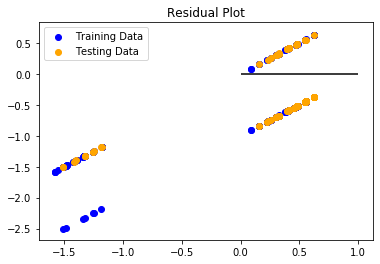

In [130]:
# # Make predictions using a fitted model
# # Plot the difference between the model predicted values and actual y values, versus the model predicted values
# # Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

predictions = model.predict(X_test_scaled)
model.fit(X_train, y_train)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

In [131]:
# # Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.4185910704443906, R2: 0.28476058768015433


In [132]:
# #print(model.predict(X_test_scaled))
print((y_test))

92     1
529    1
505    1
358    0
512    1
      ..
71     1
225    0
373    0
515    1
32     0
Name: Loan_Status, Length: 120, dtype: int64


In [133]:
# from sklearn.linear_model import LinearRegression
model = LinearRegression()
model


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [134]:
from scipy import stats

Loan_Status             1.000000
Credit_History          0.529390
LoanAmount              0.071753
TotalHouseholdIncome    0.062465
CoapplicantIncome       0.049020
ApplicantIncome         0.043152
Loan_Amount_Term        0.007798
Name: Loan_Status, dtype: float64


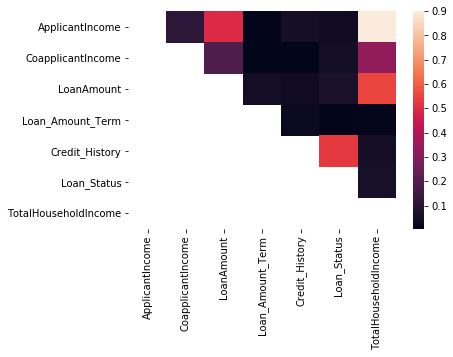

In [135]:
import seaborn as sns
corr_matrix = loan_df.corr().abs()

print(corr_matrix['Loan_Status'].sort_values(ascending=False).head(10))
# Select upper triangle of correlation matrix
matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
sns.heatmap(matrix)
plt.show;



In [136]:
loan = tree.DecisionTreeClassifier()
loan = loan.fit(X_train, y_train)
loan.score(X_test, y_test)

0.6916666666666667

In [137]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7416666666666667

In [138]:
sorted(zip(rf.feature_importances_, X.columns), reverse=True)

[(0.2778789767858344, 'TotalHouseholdIncome'),
 (0.27380224401897824, 'LoanAmount'),
 (0.2611463528193201, 'Credit_History'),
 (0.05605572108762281, 'Loan_Amount_Term'),
 (0.05283752086253189, 'Property_Area'),
 (0.03254253535963634, 'Married'),
 (0.023768153520068943, 'Gender'),
 (0.02196849554600736, 'Education')]

In [139]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [140]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [141]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8222222222222222
Testing Data Score: 0.7916666666666666


In [142]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [1 1 1 0 1 0 1 1 1 1]
First 10 Actual labels: [1, 1, 1, 0, 1, 0, 1, 1, 1, 1]


In [143]:
# classifier = LogisticRegression(class_weight = "balanced")
# classifier.fit(X_train, y_train)

In [144]:
# print(f"Training Data Score: {classifier.score(X_train, y_train)}")
# print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

In [145]:
pickle.dump(classifier,open("model.sav", "wb"))

loaded_model= pickle.load(open("model.sav","rb"))

predictions = loaded_model.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")

First 10 Predictions:   [1 1 1 0 1 0 1 1 1 1]


In [146]:
print(X_test)

TotalHouseholdIncome  Credit_History  Property_Area  Gender  Married  \
92                 5093.0             1.0              1       0        1   
529                6783.0             1.0              2       0        0   
505                7926.0             1.0              0       0        1   
358                4666.0             0.0              1       0        1   
512                5318.0             1.0              1       0        1   
..                    ...             ...            ...     ...      ...   
71                 3750.0             1.0              2       0        1   
225                3250.0             1.0              0       0        1   
373                5049.0             0.0              1       0        0   
515                6894.0             1.0              0       0        1   
32                 4692.0             1.0              0       0        0   

     Education  Loan_Amount_Term  LoanAmount  
92           0             360.0 